In [106]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set() 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [6]:
data = pd.read_csv('C:/Users/User/Downloads/house-prices-advanced-regression-techniques/train.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [136]:
import math 

data_copy = data.copy()
data_copy_norm = data_copy[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea','Street', 'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond'
                            , 'YearBuilt', 'YearRemodAdd','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
                            'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'PoolArea',
                            'YrSold']]

mean_pr = int(round(data_copy_norm['LotFrontage'].mean()))

def change_lotfront(data):
    if math.isnan(data):
        return mean_pr
    else:
        return int(round(data))

data_copy_norm['LotFrontage'] = data_copy_norm['LotFrontage'].apply(change_lotfront)
data_copy_norm['LotFrontage']

C:\Users\User\AppData\Local\Temp\ipykernel_19048\464104371.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_copy_norm['LotFrontage'] = data_copy_norm['LotFrontage'].apply(change_lotfront)


0       65
1       80
2       68
3       60
4       84
        ..
1455    62
1456    85
1457    66
1458    68
1459    75
Name: LotFrontage, Length: 1460, dtype: int64

In [101]:
data_copy_norm

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,...,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,GarageCars,GarageArea,WoodDeckSF,PoolArea,YrSold,GarageCars
0,60,RL,65,8450,Pave,CollgCr,2Story,7,5,2003,...,0,1710,3,1,2,548,0,0,2008,2
1,20,RL,80,9600,Pave,Veenker,1Story,6,8,1976,...,0,1262,3,1,2,460,298,0,2007,2
2,60,RL,68,11250,Pave,CollgCr,2Story,7,5,2001,...,0,1786,3,1,2,608,0,0,2008,2
3,70,RL,60,9550,Pave,Crawfor,2Story,7,5,1915,...,0,1717,3,1,3,642,0,0,2006,3
4,60,RL,84,14260,Pave,NoRidge,2Story,8,5,2000,...,0,2198,4,1,3,836,192,0,2008,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62,7917,Pave,Gilbert,2Story,6,5,1999,...,0,1647,3,1,2,460,0,0,2007,2
1456,20,RL,85,13175,Pave,NWAmes,1Story,6,6,1978,...,0,2073,3,1,2,500,349,0,2010,2
1457,70,RL,66,9042,Pave,Crawfor,2Story,7,9,1941,...,0,2340,4,1,1,252,0,0,2010,1
1458,20,RL,68,9717,Pave,NAmes,1Story,5,6,1950,...,0,1078,2,1,1,240,366,0,2010,1


In [142]:
print(data_copy.Street.nunique())
print(data_copy.HouseStyle.nunique())
print(data_copy.Neighborhood.nunique())

def change_street(data):
    if data == 'Pave':
        return 0
    else:
        return 1

data_copy_norm['Street'] = data_copy_norm['Street'].apply(change_street)
data_copy_norm['Street']

2
8
25


C:\Users\User\AppData\Local\Temp\ipykernel_19048\2812144920.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_copy_norm['Street'] = data_copy_norm['Street'].apply(change_street)


0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: Street, Length: 1460, dtype: int64

In [143]:
data_copy_norm.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   MSSubClass    1460 non-null   int64
 1   MSZoning      1460 non-null   int32
 2   LotFrontage   1460 non-null   int64
 3   LotArea       1460 non-null   int64
 4   Street        1460 non-null   int64
 5   Neighborhood  1460 non-null   int64
 6   HouseStyle    1460 non-null   int64
 7   OverallQual   1460 non-null   int64
 8   OverallCond   1460 non-null   int64
 9   YearBuilt     1460 non-null   int64
 10  YearRemodAdd  1460 non-null   int64
 11  BsmtFinSF1    1460 non-null   int64
 12  BsmtFinSF2    1460 non-null   int64
 13  BsmtUnfSF     1460 non-null   int64
 14  TotalBsmtSF   1460 non-null   int64
 15  1stFlrSF      1460 non-null   int64
 16  2ndFlrSF      1460 non-null   int64
 17  LowQualFinSF  1460 non-null   int64
 18  GrLivArea     1460 non-null   int64
 19  BedroomAbvGr  1460 non-null

In [122]:
label_encoder = LabelEncoder()
data_copy_norm['Neighborhood'] = label_encoder.fit_transform(data['Neighborhood'])
data_copy_norm['HouseStyle']  = label_encoder.fit_transform(data['HouseStyle'])
data_copy_norm['MSZoning'] = label_encoder.fit_transform(data['MSZoning'])

C:\Users\User\AppData\Local\Temp\ipykernel_19048\103769423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_copy_norm['Neighborhood'] = label_encoder.fit_transform(data['Neighborhood'])
C:\Users\User\AppData\Local\Temp\ipykernel_19048\103769423.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_copy_norm['HouseStyle']  = label_encoder.fit_transform(data['HouseStyle'])
C:\Users\User\AppData\Local\Temp\ipykernel_19048\103769423.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [124]:
data_copy_norm['Neighborhood']


0        5
1       24
2        5
3        6
4       15
        ..
1455     8
1456    14
1457     6
1458    12
1459     7
Name: Neighborhood, Length: 1460, dtype: int64

In [123]:
data_copy_norm['HouseStyle']

0       5
1       2
2       5
3       5
4       5
       ..
1455    5
1456    2
1457    5
1458    2
1459    2
Name: HouseStyle, Length: 1460, dtype: int64

In [125]:
data_copy_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   MSSubClass    1460 non-null   int64
 1   MSZoning      1460 non-null   int64
 2   LotFrontage   1460 non-null   int64
 3   LotArea       1460 non-null   int64
 4   Street        1460 non-null   int64
 5   Neighborhood  1460 non-null   int64
 6   HouseStyle    1460 non-null   int64
 7   OverallQual   1460 non-null   int64
 8   OverallCond   1460 non-null   int64
 9   YearBuilt     1460 non-null   int64
 10  YearRemodAdd  1460 non-null   int64
 11  BsmtFinSF1    1460 non-null   int64
 12  BsmtFinSF2    1460 non-null   int64
 13  BsmtUnfSF     1460 non-null   int64
 14  TotalBsmtSF   1460 non-null   int64
 15  1stFlrSF      1460 non-null   int64
 16  2ndFlrSF      1460 non-null   int64
 17  LowQualFinSF  1460 non-null   int64
 18  GrLivArea     1460 non-null   int64
 19  BedroomAbvGr  1460 non-null

In [126]:
region_counts = data_copy_norm['MSZoning'].value_counts()
for region, count in region_counts.items():
    print(f"Регион: {region}, Количество: {count}")

Регион: 3, Количество: 1151
Регион: 4, Количество: 218
Регион: 1, Количество: 65
Регион: 2, Количество: 16
Регион: 0, Количество: 10


In [55]:
def change_reg(data):
    if data == 'RL':
        return 0
    elif data == 'RM':
        return 1
    elif data == 'FV':
        return 2
    elif data == 'RH':
        return 3
    else:
        return 4

data_copy_norm['MSZoning'] = data_copy_norm['MSZoning'].apply(change_reg)
data_copy_norm['MSZoning']

C:\Users\User\AppData\Local\Temp\ipykernel_19048\4105636559.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_copy_norm['MSZoning'] = data_copy_norm['MSZoning'].apply(change_reg)


0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: MSZoning, Length: 1460, dtype: int64

In [127]:
data_copy_norm

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,...,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,GarageCars,GarageArea,WoodDeckSF,PoolArea,YrSold,GarageCars
0,60,3,65,8450,0,5,5,7,5,2003,...,0,1710,3,1,2,548,0,0,2008,2
1,20,3,80,9600,0,24,2,6,8,1976,...,0,1262,3,1,2,460,298,0,2007,2
2,60,3,68,11250,0,5,5,7,5,2001,...,0,1786,3,1,2,608,0,0,2008,2
3,70,3,60,9550,0,6,5,7,5,1915,...,0,1717,3,1,3,642,0,0,2006,3
4,60,3,84,14260,0,15,5,8,5,2000,...,0,2198,4,1,3,836,192,0,2008,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62,7917,0,8,5,6,5,1999,...,0,1647,3,1,2,460,0,0,2007,2
1456,20,3,85,13175,0,14,2,6,6,1978,...,0,2073,3,1,2,500,349,0,2010,2
1457,70,3,66,9042,0,6,5,7,9,1941,...,0,2340,4,1,1,252,0,0,2010,1
1458,20,3,68,9717,0,12,2,5,6,1950,...,0,1078,2,1,1,240,366,0,2010,1


In [128]:
data_copy_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   MSSubClass    1460 non-null   int64
 1   MSZoning      1460 non-null   int64
 2   LotFrontage   1460 non-null   int64
 3   LotArea       1460 non-null   int64
 4   Street        1460 non-null   int64
 5   Neighborhood  1460 non-null   int64
 6   HouseStyle    1460 non-null   int64
 7   OverallQual   1460 non-null   int64
 8   OverallCond   1460 non-null   int64
 9   YearBuilt     1460 non-null   int64
 10  YearRemodAdd  1460 non-null   int64
 11  BsmtFinSF1    1460 non-null   int64
 12  BsmtFinSF2    1460 non-null   int64
 13  BsmtUnfSF     1460 non-null   int64
 14  TotalBsmtSF   1460 non-null   int64
 15  1stFlrSF      1460 non-null   int64
 16  2ndFlrSF      1460 non-null   int64
 17  LowQualFinSF  1460 non-null   int64
 18  GrLivArea     1460 non-null   int64
 19  BedroomAbvGr  1460 non-null

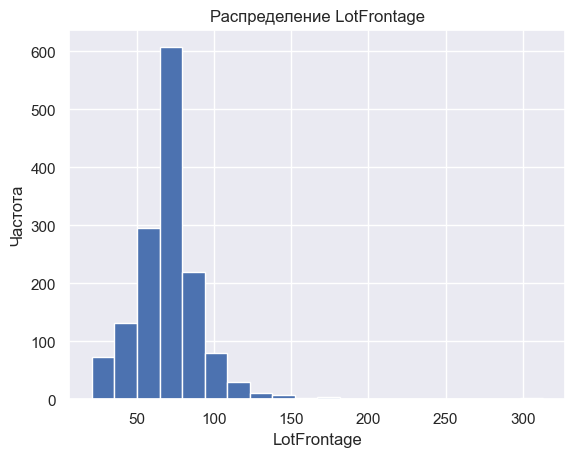

In [130]:
plt.hist(data_copy_norm['LotFrontage'], bins=20)  
plt.xlabel('LotFrontage')
plt.ylabel('Частота')
plt.title('Распределение LotFrontage')
plt.show()

In [145]:
data_copy_norm

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,...,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,GarageCars,GarageArea,WoodDeckSF,PoolArea,YrSold
0,60,3,65,8450,0,5,5,7,5,2003,...,854,0,1710,3,1,2,548,0,0,2008
1,20,3,80,9600,0,24,2,6,8,1976,...,0,0,1262,3,1,2,460,298,0,2007
2,60,3,68,11250,0,5,5,7,5,2001,...,866,0,1786,3,1,2,608,0,0,2008
3,70,3,60,9550,0,6,5,7,5,1915,...,756,0,1717,3,1,3,642,0,0,2006
4,60,3,84,14260,0,15,5,8,5,2000,...,1053,0,2198,4,1,3,836,192,0,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62,7917,0,8,5,6,5,1999,...,694,0,1647,3,1,2,460,0,0,2007
1456,20,3,85,13175,0,14,2,6,6,1978,...,0,0,2073,3,1,2,500,349,0,2010
1457,70,3,66,9042,0,6,5,7,9,1941,...,1152,0,2340,4,1,1,252,0,0,2010
1458,20,3,68,9717,0,12,2,5,6,1950,...,0,0,1078,2,1,1,240,366,0,2010


In [147]:
X = data_copy_norm
y = data_copy['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [132]:
mae

23113.739180999368

In [146]:
data_copy

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,3,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,3,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,3,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,3,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,3,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,3,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,3,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [134]:
r2

0.8182046808875654

In [160]:
new_data = pd.DataFrame({
    'MSSubClass': [60],
    'MSZoning': [3],
    'LotFrontage': [65],
    'LotArea': [8450],
    'Street': [0],
    'Neighborhood': [5],
    'HouseStyle': [5],
    'OverallQual': [7],
    'OverallCond': [5],
    'YearBuilt': [2003],
    'YearRemodAdd': [2003],
    'BsmtFinSF1': [706],
    'BsmtFinSF2': [0],
    'BsmtUnfSF': [150],
    'TotalBsmtSF': [856],
    '1stFlrSF': [856],
    '2ndFlrSF': [854],
    'LowQualFinSF': [0],
    'GrLivArea': [1710],
    'BedroomAbvGr': [3],
    'KitchenAbvGr': [1],
    'GarageCars': [2],
    'GarageArea': [548],
    'WoodDeckSF': [0],
    'PoolArea': [0],
    'YrSold': [2008]
})

predicted_survival = model.predict(new_data)
int(round(predicted_survival[0]))

219189

In [159]:
data_copy

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,3,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,3,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,3,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,3,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,3,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,3,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,3,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
